In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Adpated from https://github.com/derekbanas/seaborn/blob/master/SB%20Tut.ipynb

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

# total -> Number of drivers involved in fatal collisions per billion miles (5.900–23.900)
# speeding -> Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (1.792–9.450)
# alcohol -> Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (1.593–10.038)
# not_distracted -> Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted (1.760–23.661)
# no_previous -> Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (5.900–21.280)
# ins_premium -> Car Insurance Premiums (641.960–1301.520)
# ins_losses -> Losses incurred by insurance companies for collisions per insured driver (82.75–194.780)
# abbrev -> USA states

print(crash_df.head())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


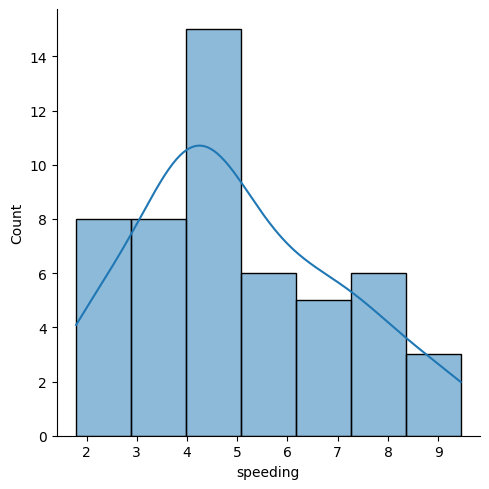

In [12]:
# Provides a way to look at a univariate distribution. A 
# univeriate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE
# Bins define how many buckets to divide the data up into between intervals

sns.displot(crash_df['speeding'], kde=True, bins=7)


#lOfCols = crash_df.columns.tolist()
#print(lOfCols)
#for c in lOfCols:
#    plt = sns.displot(crash_df[c], kde=True, bins=5)
#    plt.figure.savefig(c+".png")

<Axes: xlabel='ins_losses', ylabel='Density'>

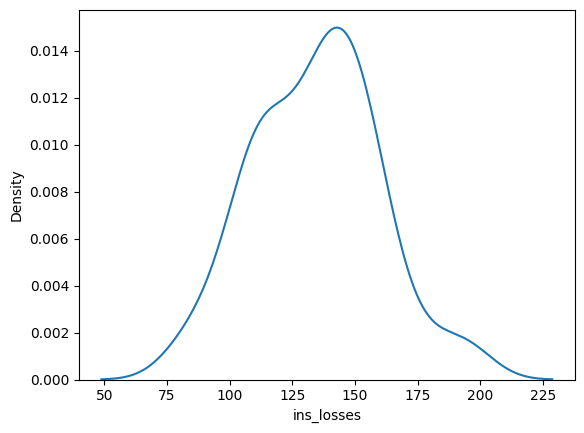

In [8]:
# Get just the KDE plot
sns.kdeplot(crash_df['ins_losses'])

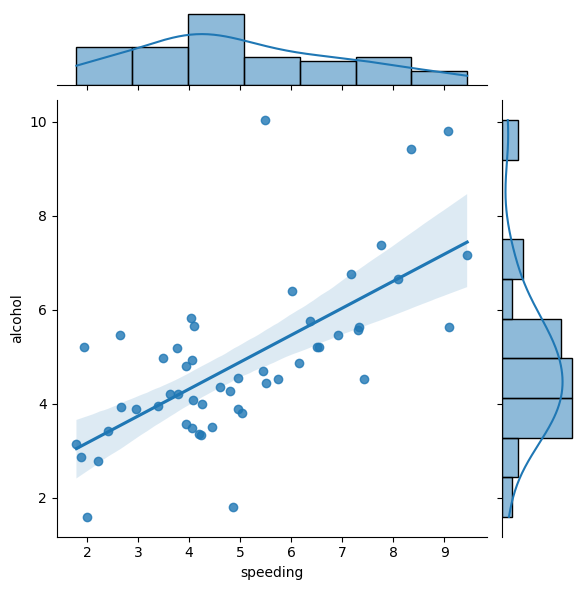

In [11]:
# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# Kernal Density Estimation estimates the distribution of data
# You can create a hexagon distribution with kind='hex'

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

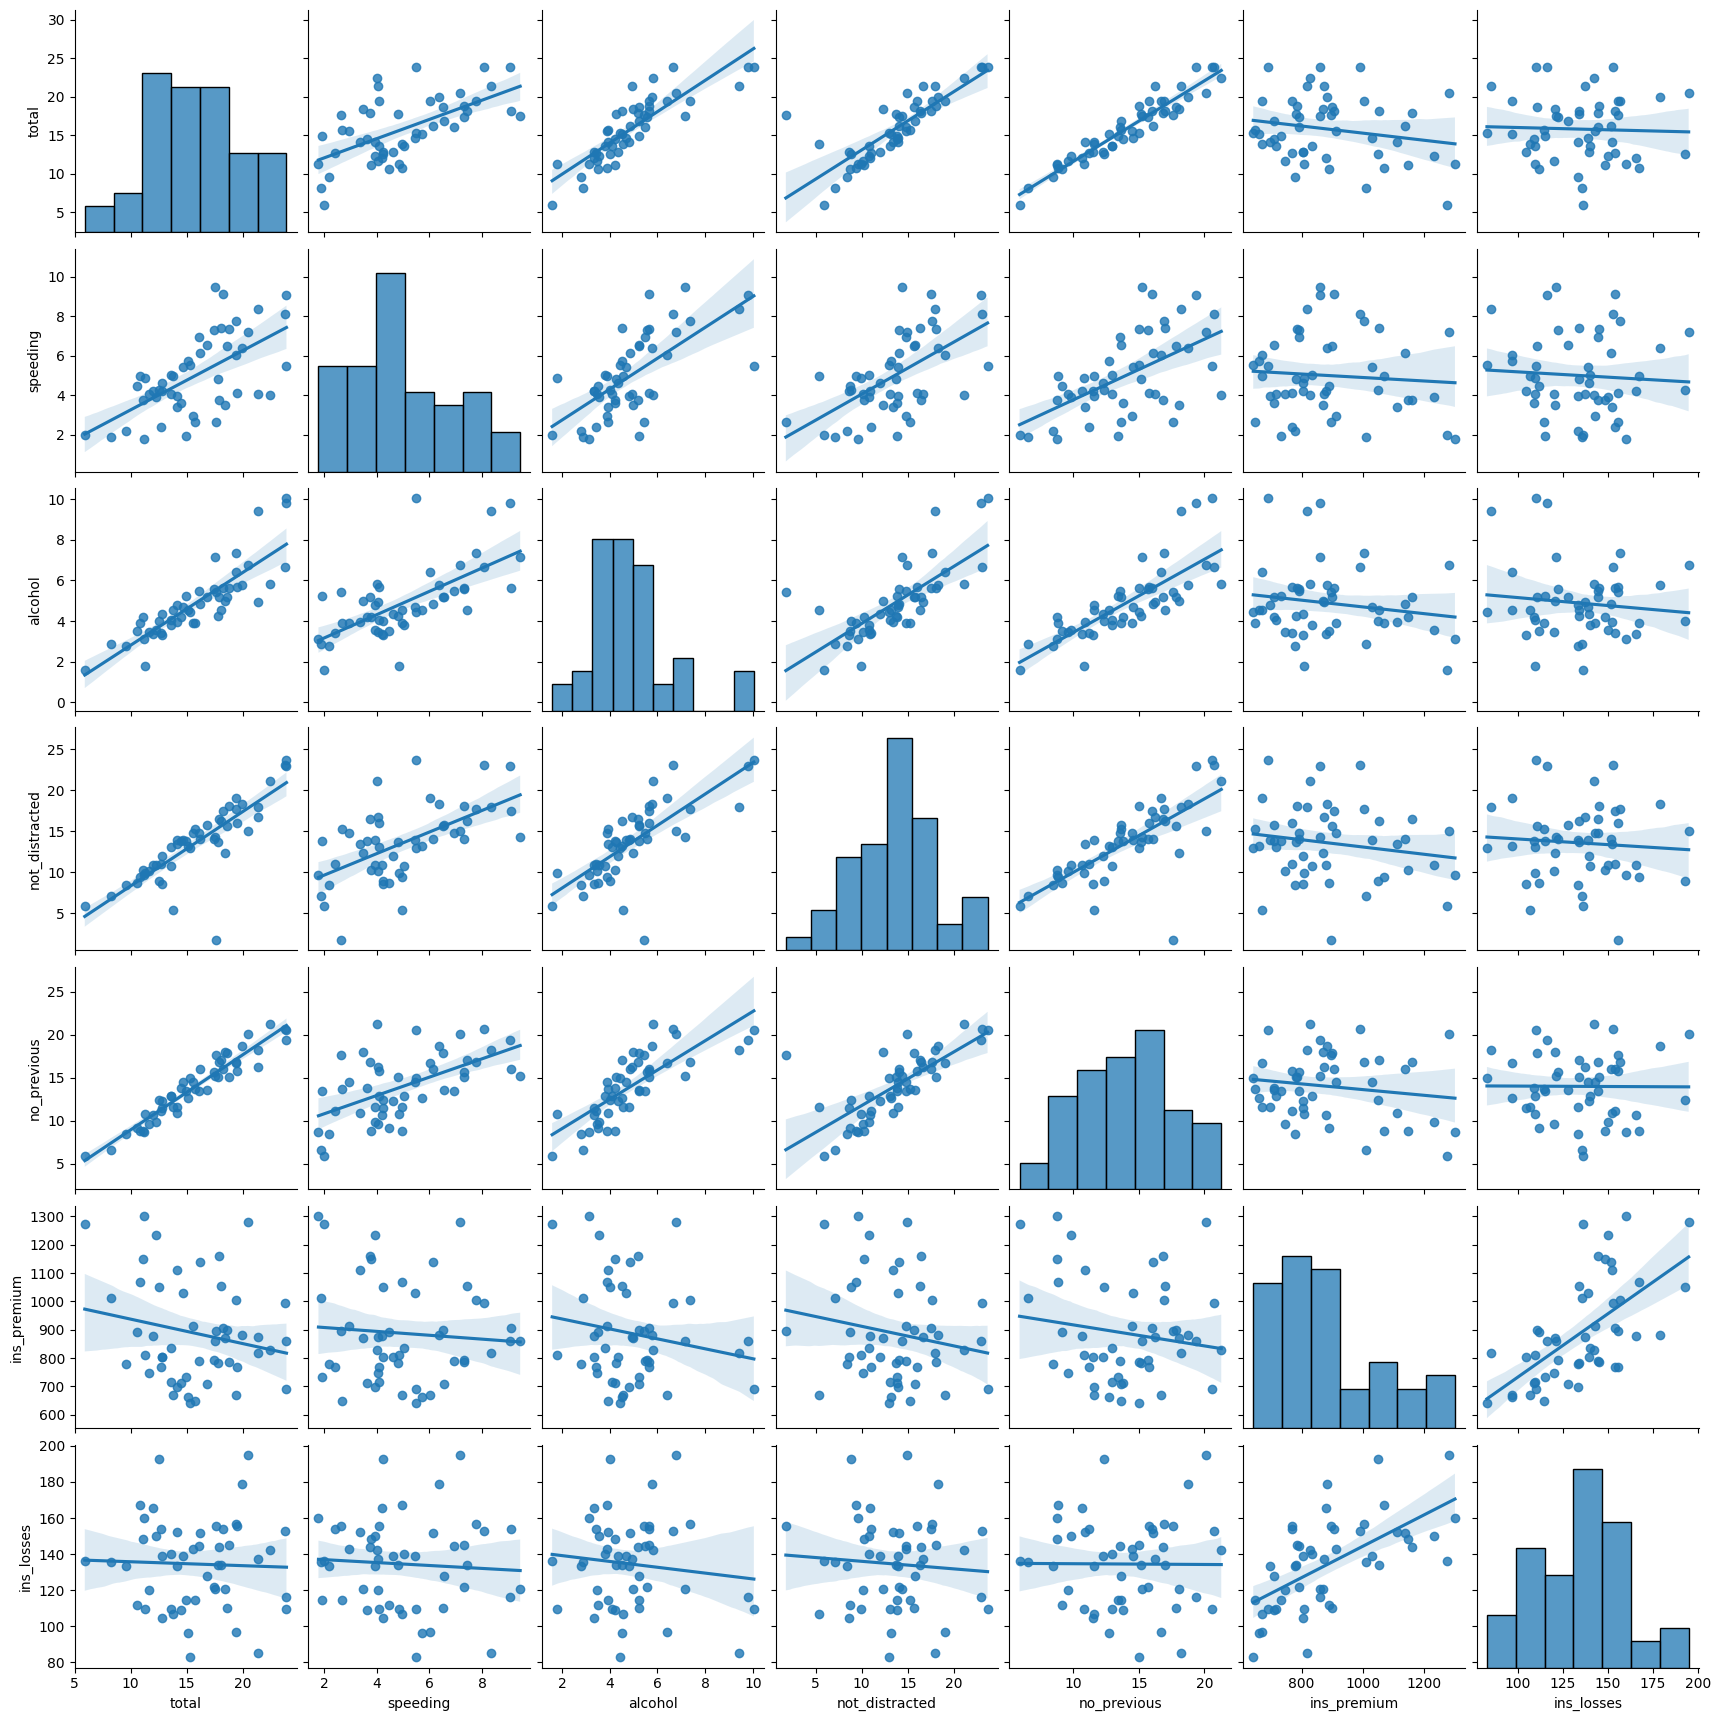

In [3]:
# Pair Plot plots relationships across the entire data frames numerical values
sns.pairplot(crash_df, kind="reg")

<Axes: xlabel='alcohol'>

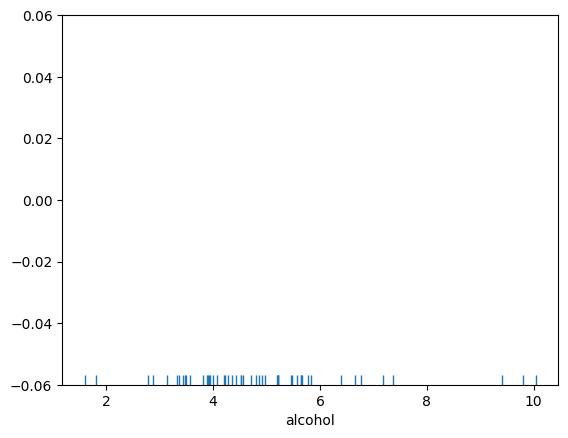

In [6]:
# Plots a single column of datapoints in an array as sticks on an axis
# With a rug plot you'll see a more dense number of lines where the amount is 
# most common. This is like how a histogram is taller where values are more common
sns.rugplot(crash_df['alcohol'])

<Figure size 1000x600 with 0 Axes>

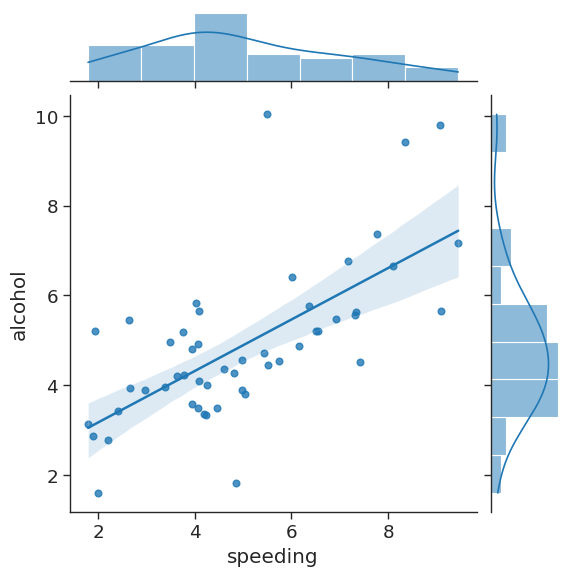

In [6]:
# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('ticks')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(10,6))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale=1.5)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

plt.show()


    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
10   15.6     2.964    3.900          14.820       14.508       913.15   
15   15.7     2.669    3.925          15.229       13.659       649.06   
43   19.4     7.760    7.372          17.654       16.878      1004.75   

    ins_losses abbrev  
10      142.80     GA  
15      114.47     IA  
43      156.83     TX  


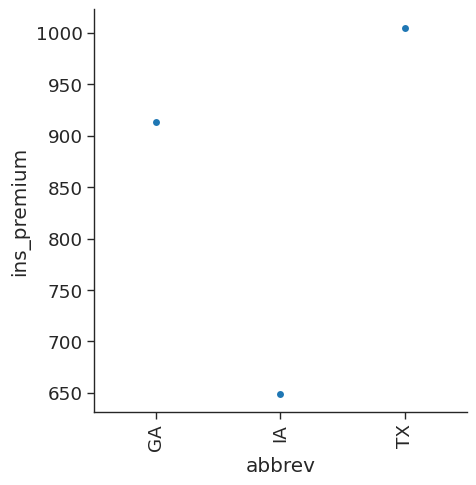

In [7]:
# Focus on distributions using categorical data in reference to one of the numerical
# columns

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a subset that only contains GA, TX, and IA data
crash_df_sub = crash_df[(crash_df['abbrev'].isin(['GA', 'TX', 'IA']))]
print(crash_df_sub)

# Aggregate categorical data based on a function (median in this case)
sns.catplot(x='abbrev', y='ins_premium', data=crash_df_sub, estimator=np.median)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()


<Axes: xlabel='abbrev', ylabel='count'>

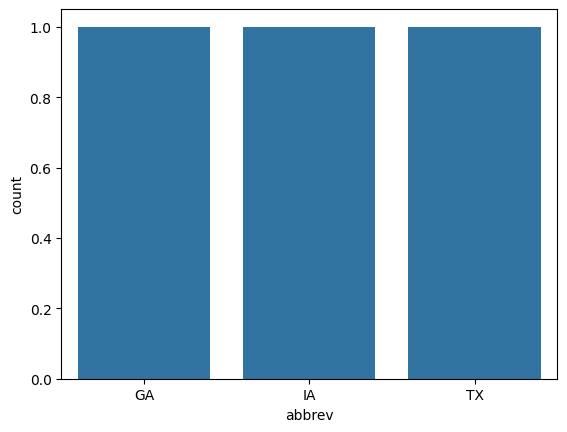

In [11]:
# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances
sns.countplot(x='abbrev',data=crash_df_sub)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0    18.8     7.332    5.640          18.048       15.040       784.55   
1    18.1     7.421    4.525          16.290       17.014      1053.48   
2    18.6     6.510    5.208          15.624       17.856       899.47   
3    22.4     4.032    5.824          21.056       21.280       827.34   
4    12.0     4.200    3.360          10.920       10.680       878.41   
5    13.6     5.032    3.808          10.744       12.920       835.50   
6    10.8     4.968    3.888           9.396        8.856      1068.73   
7    16.2     6.156    4.860          14.094       16.038      1137.87   
8     5.9     2.006    1.593           5.900        5.900      1273.89   
9    17.9     3.759    5.191          16.468       16.826      1160.13   
10   15.6     2.964    3.900          14.820       14.508       913.15   
11   17.5     9.450    7.175          14.350       15.225       861.18   
12   15.3     5.508    4.437          

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '(0, 10]'),
  Text(1, 0, '(10, 20]'),
  Text(2, 0, '(20, 30]'),
  Text(3, 0, '(30, 40]'),
  Text(4, 0, '(40, 50]'),
  Text(5, 0, '(50, 60]'),
  Text(6, 0, '(60, 70]'),
  Text(7, 0, '(70, 80]'),
  Text(8, 0, '(80, 90]'),
  Text(9, 0, '(90, 100]'),
  Text(10, 0, '(100, 110]'),
  Text(11, 0, '(110, 120]'),
  Text(12, 0, '(120, 130]'),
  Text(13, 0, '(130, 140]'),
  Text(14, 0, '(140, 150]'),
  Text(15, 0, '(150, 160]'),
  Text(16, 0, '(160, 170]'),
  Text(17, 0, '(170, 180]'),
  Text(18, 0, '(180, 190]'),
  Text(19, 0, '(190, 200]')])

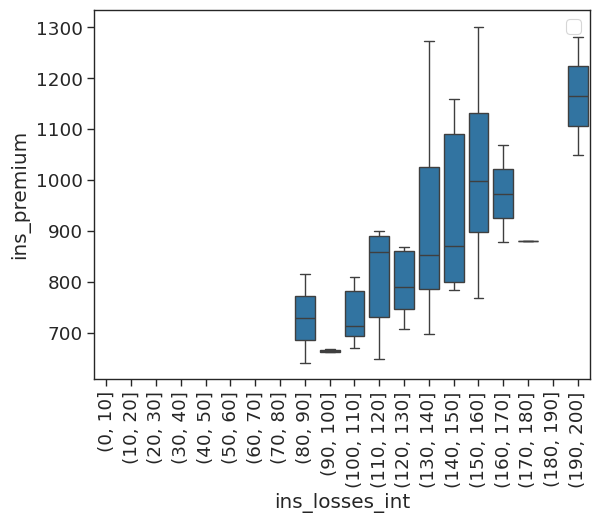

In [8]:
#print(crash_df['ins_losses'].max())
crash_df['ins_losses_int'] = pd.cut(crash_df['ins_losses'], bins=np.arange(0,210,10))
print(crash_df)

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
sns.boxplot(x='ins_losses_int',y='ins_premium',data=crash_df)

# Moves legend to the best position
plt.legend(loc=0)
plt.xticks(rotation=90)

In [14]:
tips_df = sns.load_dataset('tips')
print(tips_df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


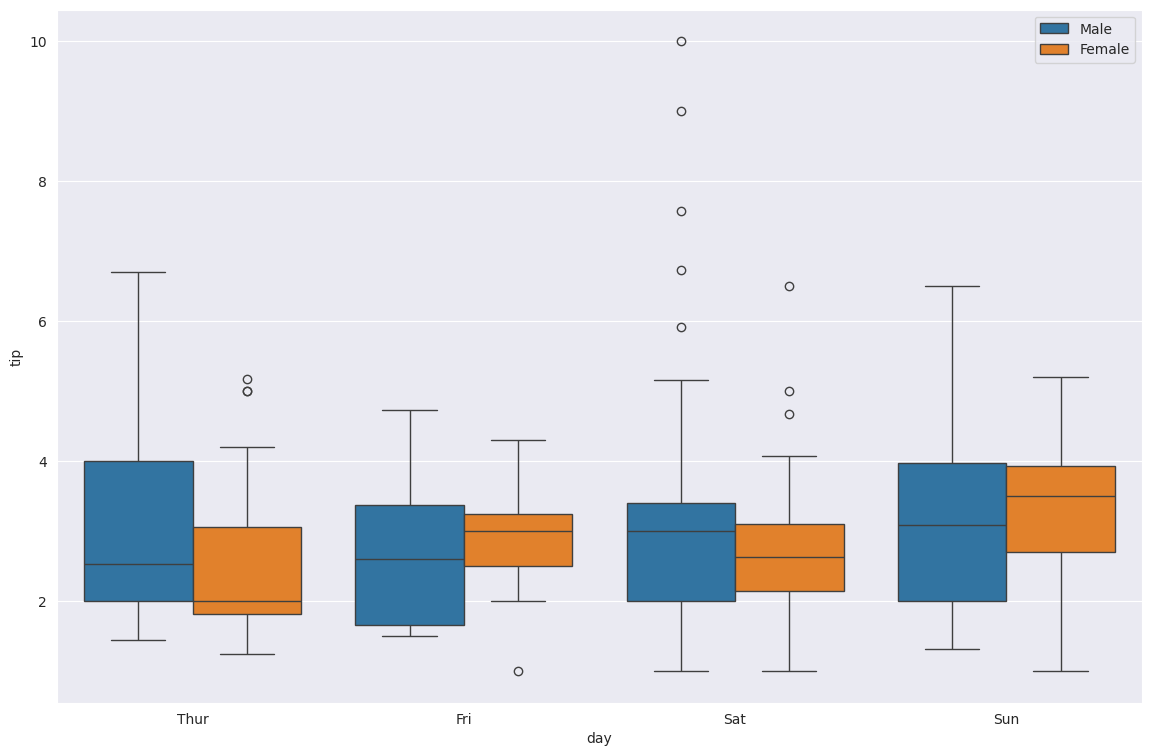

In [15]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
# Hue can add another category being sex
# We see men spend way more on Friday versus less than women on Saturday
sns.boxplot(x='day',y='tip',data=tips_df, hue='sex')

# Moves legend to the best position
plt.legend(loc=0)

<Axes: xlabel='day', ylabel='total_bill'>

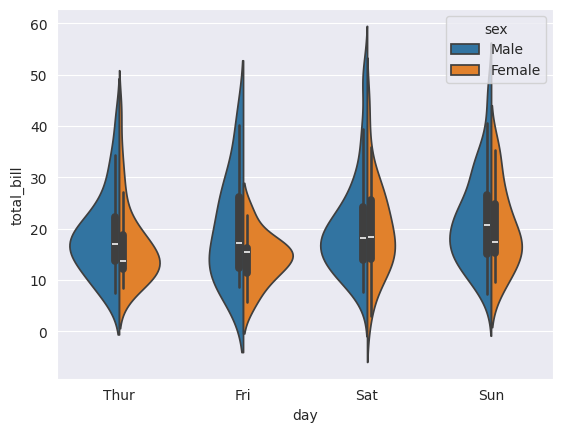

In [16]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points
# Split allows you to compare how the categories compare to each other
sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)

<Axes: xlabel='day', ylabel='total_bill'>

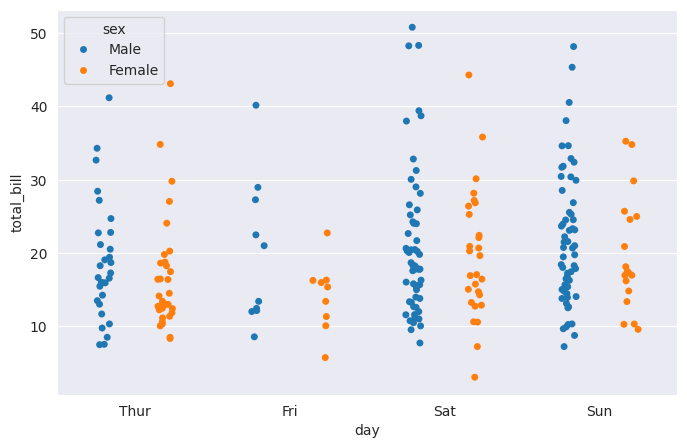

In [17]:
plt.figure(figsize=(8,5))

# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)

/tmp/ipykernel_38519/1768504121.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white', hue="sex")


<Axes: xlabel='day', ylabel='total_bill'>

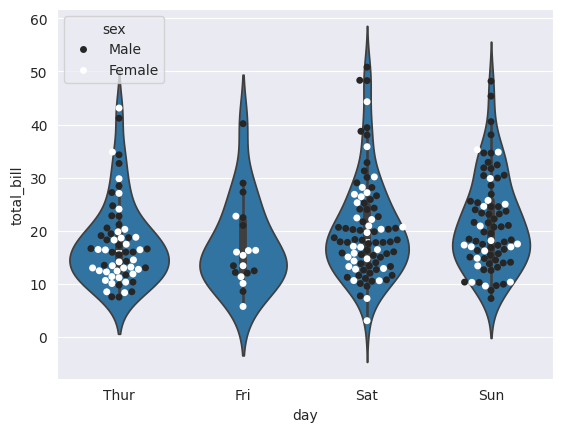

In [18]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots
# sns.swarmplot(x='day',y='total_bill',data=tips_df)

# You can stack a violin plot with a swarm
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white', hue="sex")

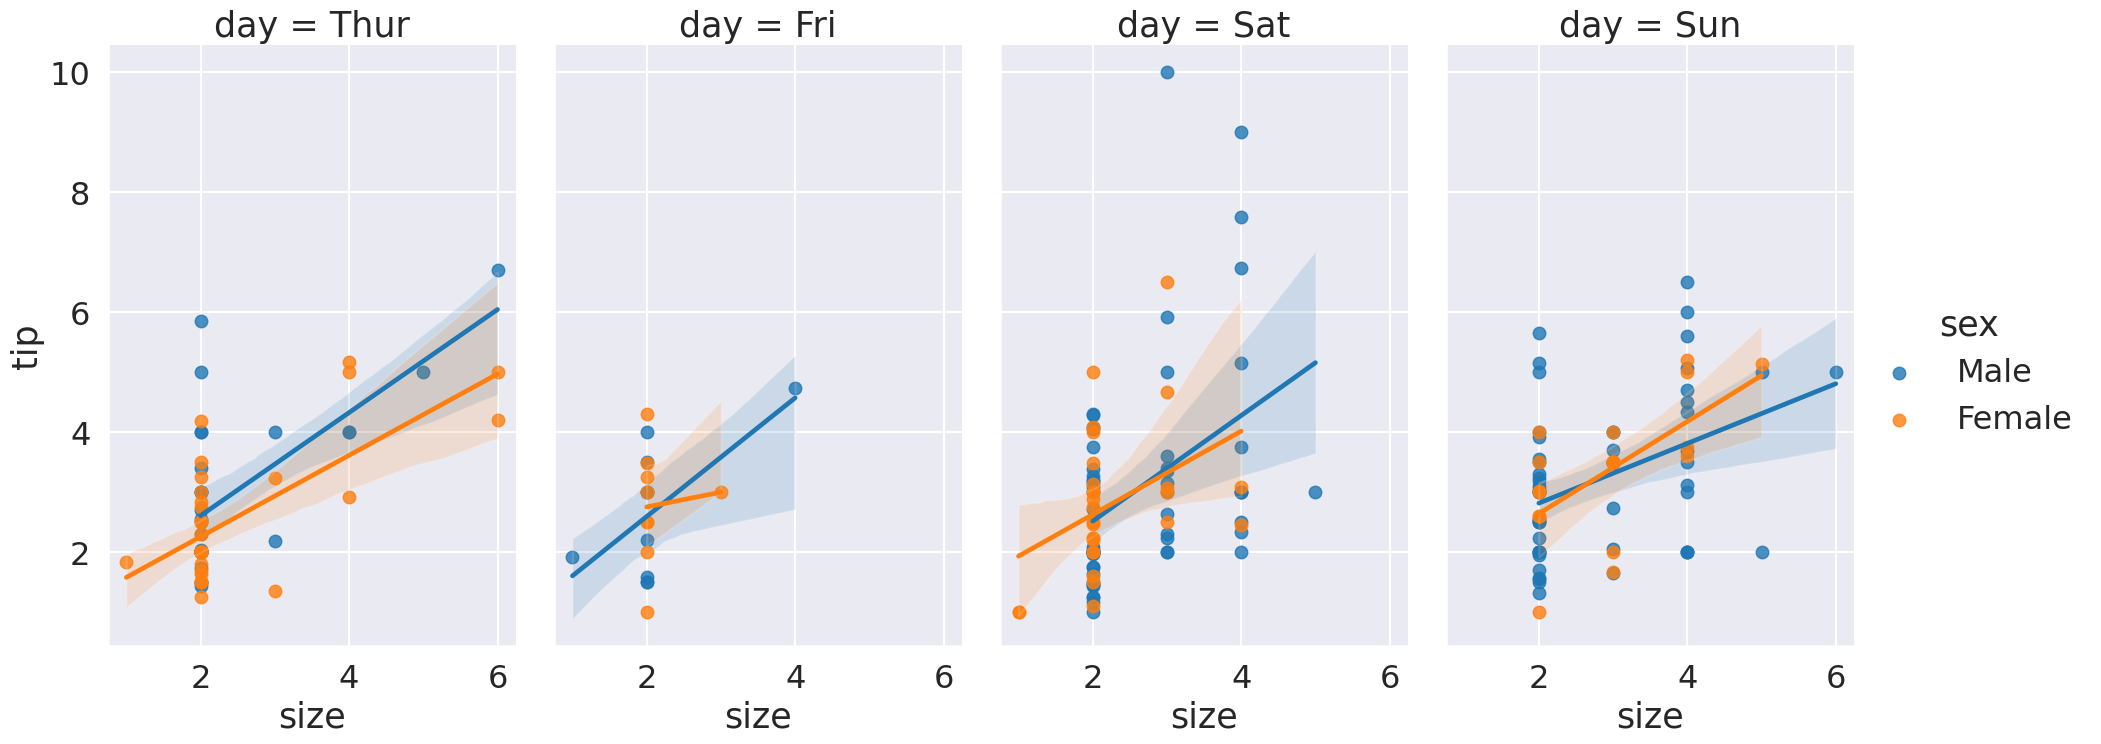

In [19]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('talk', font_scale=1.4)

sns.lmplot(x='size', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6)